In [18]:
from datasets import load_dataset
from datasets import Dataset, Image
from glob import glob
from tqdm import tqdm
import linecache
import json
import mp
import os

In [23]:
files = glob('partitions/*.jsonl')
len(files)

52

In [44]:
with open('partitions/0.jsonl') as fopen:
    for l in fopen:
        l = json.loads(l)
        break

In [46]:
from tqdm import tqdm

def loop(files):
    files, _ = files
    results = []
    for file in files:
        index = file.split('/')[-1].replace('.jsonl', '')
        with open(file) as fopen:
            i = 0
            for l in tqdm(fopen):
                l = json.loads(l)
                filename = os.path.join('image', f'{index}-{i}.jpeg')
                if not os.path.exists(filename):
                    i += 1
                    continue
                    
                l.pop('image_base64', None)
                    
                l['filename'] = filename
                l['image'] = filename
                    
                results.append(l)
                
                i += 1
                
    return results

In [47]:
r = mp.multiprocessing(files, loop, cores = 30, returned = True)

29037it [00:01, 18642.28it/s]
40000it [00:01, 22103.28it/s]

40000it [00:01, 21251.70it/s]
40000it [00:01, 21042.81it/s]
36005it [00:01, 17829.74it/s]
40000it [00:01, 21171.16it/s]
39530it [00:01, 18557.95it/s]
40000it [00:01, 21262.01it/s]
37543it [00:01, 20585.82it/s]
40000it [00:01, 20369.79it/s]
35477it [00:01, 17886.55it/s]
37976it [00:02, 18819.08it/s]
23115it [00:02, 14932.22it/s]

37816it [00:02, 17147.90it/s]
40000it [00:02, 19565.37it/s]
39081it [00:02, 20506.85it/s]
40000it [00:02, 19040.05it/s]
7216it [00:02, 3937.58it/s]
40000it [00:02, 18849.61it/s]
38156it [00:02, 16462.71it/s]
40000it [00:02, 18212.85it/s]
26636it [00:02, 16164.13it/s]
40000it [00:02, 17925.18it/s]
14963it [00:00, 22401.58it/s]
40000it [00:02, 17031.35it/s]
40000it [00:03, 12889.85it/s]
40000it [00:01, 20912.70it/s]
40000it [00:03, 10540.66it/s]
40000it [00:01, 24376.87it/s]
40000it [00:01, 24370.18it/s]
40000it [00:01, 25056.78it/s]
40000it [00:01, 24232.65it/s]
40000it [00:01, 23365.82it/s]
40000it [0

In [48]:
len(r)

1455143

In [49]:
dataset = Dataset.from_list(r)
dataset = dataset.cast_column("image", Image())
dataset

Dataset({
    features: ['alt_text', 'image_url', 'parent_href', 'filename', 'image'],
    num_rows: 1455143
})

In [50]:
dataset[0]

{'alt_text': '8 Best Beaches in Hawaii - Princess Cruises',
 'image_url': None,
 'parent_href': 'https://www.google.com/imgres?imgurl=https%3A%2F%2Fassets.princess.com%2Fis%2Fimage%2Fprincesscruises%2Fmakena-maui-hawaii-sunset-beach-shoreline-palm-trees%3A16x9%3Fts%3D1698260482806&tbnid=0KpifwbFM9uGyM&vet=12ahUKEwi2pdTUvPWEAxU2FmIAHSdDBlkQMygIegQIARBq..i&imgrefurl=https%3A%2F%2Fwww.princess.com%2Fen-us%2Fcruise-destinations%2Fhawaii-cruises%2Fhawaii-cruise-tips%2Flearn-about-hawaii%2F8-best-beaches-in-hawaii&docid=lmpa-JrygPzXnM&w=1220&h=686&q=hawai&ved=2ahUKEwi2pdTUvPWEAxU2FmIAHSdDBlkQMygIegQIARBq',
 'filename': 'image/33-0.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1220x686>}

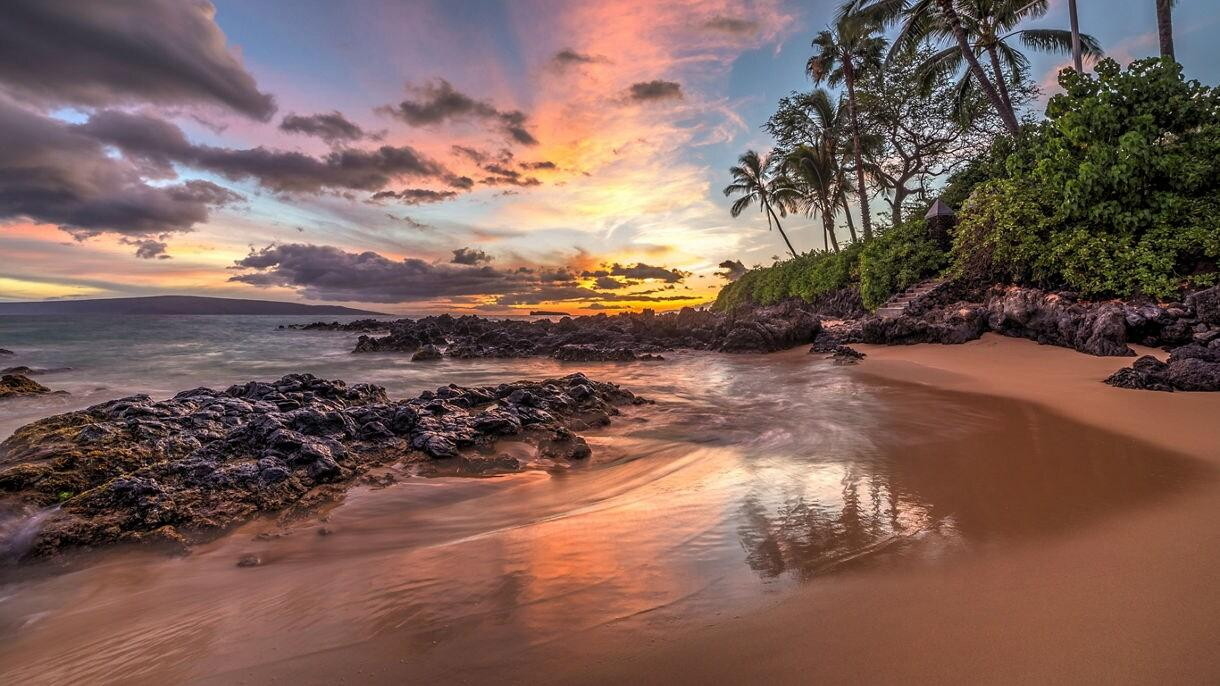

In [51]:
dataset[0]['image']

In [52]:
dataset[-1]

{'alt_text': 'New Music: Halle Abadi - Discover New Music & Unsigned Talent - Alfitude',
 'image_url': None,
 'parent_href': 'https://www.google.com/imgres?imgurl=https%3A%2F%2Falfitude.com%2Fwp-content%2Fuploads%2F2021%2F08%2FHalle-Abadi.jpg&tbnid=8DcTeqZ6DuhK3M&vet=12ahUKEwjZgJ_o-OyEAxW9whQJHai0DyIQMygKegQIARBh..i&imgrefurl=https%3A%2F%2Falfitude.com%2F2021%2F08%2F27%2Fnew-music-halle-abadi%2F&docid=Ubpu9NkEZ6mA4M&w=960&h=640&q=abadi&ved=2ahUKEwjZgJ_o-OyEAxW9whQJHai0DyIQMygKegQIARBh',
 'filename': 'image/20-39999.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>}

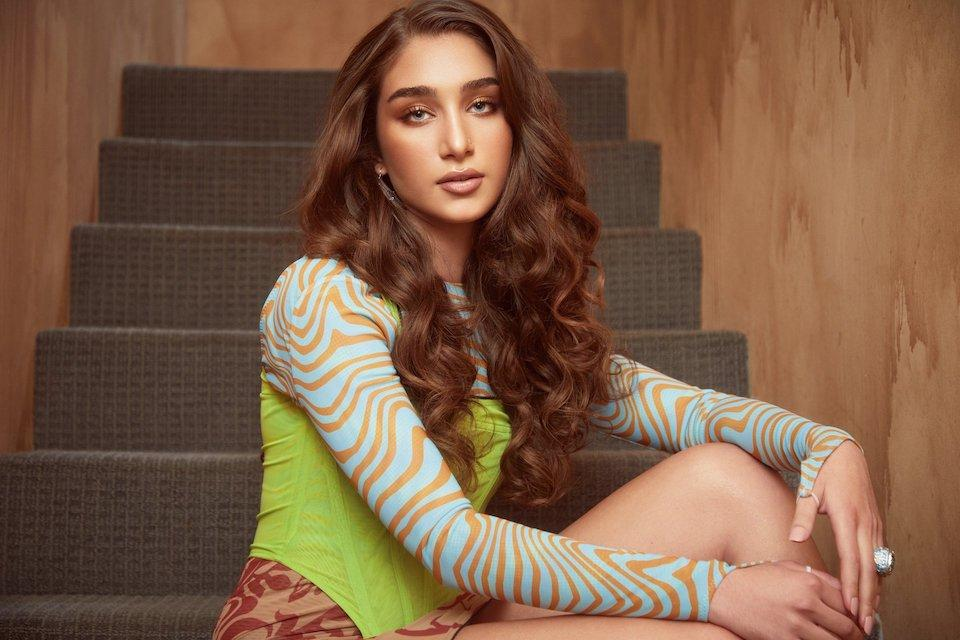

In [54]:
dataset[-1]['image']

In [55]:
dataset[10000]

{'alt_text': 'Cara Buat Pajeri Nenas Yang Sedap Dan Pekat Tanpa Santan',
 'image_url': None,
 'parent_href': 'https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn.rasa.my%2F2023%2F10%2F90255534_3114356468615839_665904412610265088_n.jpg&tbnid=weu8xzeuPC13rM&vet=12ahUKEwj7raecjOyEAxViPlkFHXWaAycQMygTegQIARB2..i&imgrefurl=https%3A%2F%2Fwww.rasa.my%2Fcara-buat-pajeri-nenas-yang-sedap-dan-pekat-tanpa-santan%2F&docid=RFOGSrbujmz7mM&w=1080&h=1440&q=pajeri&ved=2ahUKEwj7raecjOyEAxViPlkFHXWaAycQMygTegQIARB2',
 'filename': 'image/33-13720.jpeg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1440>}

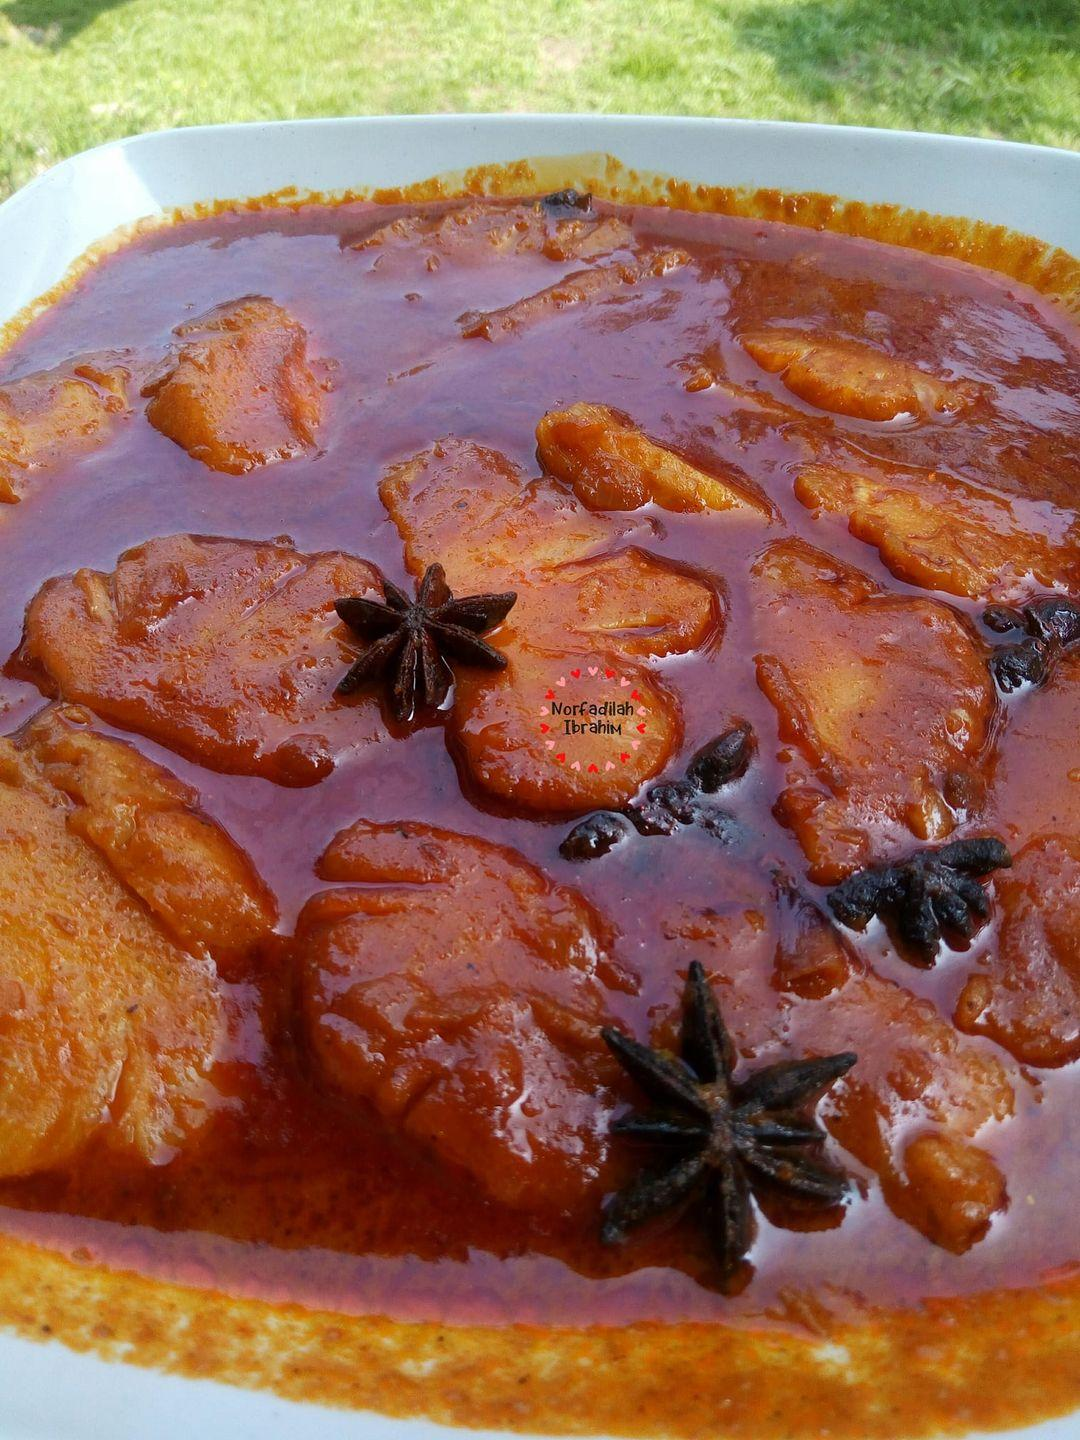

In [56]:
dataset[10000]['image']

In [62]:
dataset.push_to_hub(repo_id = 'malaysia-ai/crawl-google-image')

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/369 [00:00<?, ?it/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3944 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]

Map:   0%|          | 0/3943 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/40 [00:00<?, ?ba/s]